# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
%matplotlib inline

In [3]:
path = r'C:\\Users\\figue\\Data Analysis UFC'

In [4]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'UFC_Map.csv'))

In [5]:
pd.set_option('display.max_columns', None)

# Data Cleaning

In [6]:
# Checking Data 
df.head()

,Unnamed: 0.1,Unnamed: 0,R_fighter,B_fighter,Referee,date,Winner,Title Fight,weight_class,B Rounds,B Title Fights,B_current_win_streak,B_current_lose_streak,B_longest_win_streak,B_wins,B_losses,B_draw,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_Stance,B_Weight_lbs,R Rounds,R Title Fights,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_Stance,R_Weight_lbs,B_age,R_age,R_Age Range,B_Age Range,Country1
0,0,0,Adrian Yanez,Gustavo Lopez,Chris Tognoni,3/20/2021,Red,False,Bantamweight,4,0,0,1,1,1,1,0,0,0,1,Orthodox,135,1,0,1,0,1,1,0,0,0,1,0,Orthodox,135,31.0,27.0,Young Prospect,Experienced,United States of America
1,1,1,Trevin Giles,Roman Dolidze,Herb Dean,3/20/2021,Red,False,Middleweight,4,0,2,0,2,2,0,0,0,1,0,Orthodox,205,17,0,2,0,2,4,2,0,0,3,0,Orthodox,185,32.0,28.0,Experienced,Experienced,United States of America
2,2,2,Marion Reneau,Macy Chiasson,Mark Smith,3/20/2021,Blue,False,WomenBantamweight,11,1,3,0,3,4,1,0,1,2,1,Orthodox,135,30,0,2,0,2,5,6,0,1,2,2,Orthodox,135,29.0,43.0,Veteran,Experienced,United States of America
3,3,3,Leonardo Santos,Grant Dawson,Chris Tognoni,3/20/2021,Blue,False,Lightweight,10,0,4,0,4,4,0,0,2,0,2,Switch,145,18,1,1,0,6,7,1,0,2,2,2,Orthodox,155,27.0,41.0,Veteran,Young Prospect,United States of America
4,4,4,Song Kenan,Max Griffin,Keith Peterson,3/20/2021,Blue,False,Welterweight,28,0,0,1,1,4,6,0,1,2,0,Orthodox,170,10,0,2,0,2,4,1,0,1,3,0,Orthodox,170,35.0,31.0,Experienced,Experienced,United States of America


In [7]:
df = df.drop(columns = ['Unnamed: 0.1', 'Unnamed: 0'])

In [8]:
df.head()

,R_fighter,B_fighter,Referee,date,Winner,Title Fight,weight_class,B Rounds,B Title Fights,B_current_win_streak,B_current_lose_streak,B_longest_win_streak,B_wins,B_losses,B_draw,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_Stance,B_Weight_lbs,R Rounds,R Title Fights,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_Stance,R_Weight_lbs,B_age,R_age,R_Age Range,B_Age Range,Country1
0,Adrian Yanez,Gustavo Lopez,Chris Tognoni,3/20/2021,Red,False,Bantamweight,4,0,0,1,1,1,1,0,0,0,1,Orthodox,135,1,0,1,0,1,1,0,0,0,1,0,Orthodox,135,31.0,27.0,Young Prospect,Experienced,United States of America
1,Trevin Giles,Roman Dolidze,Herb Dean,3/20/2021,Red,False,Middleweight,4,0,2,0,2,2,0,0,0,1,0,Orthodox,205,17,0,2,0,2,4,2,0,0,3,0,Orthodox,185,32.0,28.0,Experienced,Experienced,United States of America
2,Marion Reneau,Macy Chiasson,Mark Smith,3/20/2021,Blue,False,WomenBantamweight,11,1,3,0,3,4,1,0,1,2,1,Orthodox,135,30,0,2,0,2,5,6,0,1,2,2,Orthodox,135,29.0,43.0,Veteran,Experienced,United States of America
3,Leonardo Santos,Grant Dawson,Chris Tognoni,3/20/2021,Blue,False,Lightweight,10,0,4,0,4,4,0,0,2,0,2,Switch,145,18,1,1,0,6,7,1,0,2,2,2,Orthodox,155,27.0,41.0,Veteran,Young Prospect,United States of America
4,Song Kenan,Max Griffin,Keith Peterson,3/20/2021,Blue,False,Welterweight,28,0,0,1,1,4,6,0,1,2,0,Orthodox,170,10,0,2,0,2,4,1,0,1,3,0,Orthodox,170,35.0,31.0,Experienced,Experienced,United States of America


## Missing Values

In [9]:
df.isnull().sum()

R_fighter                        0
B_fighter                        0
Referee                          0
date                             0
Winner                           0
Title Fight                      0
weight_class                     0
B Rounds                         0
B Title Fights                   0
B_current_win_streak             0
B_current_lose_streak            0
B_longest_win_streak             0
B_wins                           0
B_losses                         0
B_draw                           0
B_win_by_Decision_Unanimous      0
B_win_by_KO/TKO                  0
B_win_by_Submission              0
B_Stance                        11
B_Weight_lbs                     0
R Rounds                         0
R Title Fights                   0
R_current_win_streak             0
R_current_lose_streak            0
R_longest_win_streak             0
R_wins                           0
R_losses                         0
R_draw                           0
R_win_by_Decision_Un

In [10]:
mv = df['R_age'].mean()

In [11]:
df['R_age'].fillna(value=mv, inplace=True)

In [12]:
mv2 = df['B_age'].mean()

In [13]:
df['B_age'].fillna(value=mv2, inplace=True)

In [14]:
df.isnull().sum()

R_fighter                        0
B_fighter                        0
Referee                          0
date                             0
Winner                           0
Title Fight                      0
weight_class                     0
B Rounds                         0
B Title Fights                   0
B_current_win_streak             0
B_current_lose_streak            0
B_longest_win_streak             0
B_wins                           0
B_losses                         0
B_draw                           0
B_win_by_Decision_Unanimous      0
B_win_by_KO/TKO                  0
B_win_by_Submission              0
B_Stance                        11
B_Weight_lbs                     0
R Rounds                         0
R Title Fights                   0
R_current_win_streak             0
R_current_lose_streak            0
R_longest_win_streak             0
R_wins                           0
R_losses                         0
R_draw                           0
R_win_by_Decision_Un

## Duplicates

In [15]:
dups = df.duplicated()

In [16]:
dups.shape

(4560,)

## Extreme Values Check

### Red fighter wins

C:\Users\figue\AppData\Local\Temp\ipykernel_8\711398104.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  rw = sns.distplot(df['R_wins'], bins=25)
C:\Users\figue\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


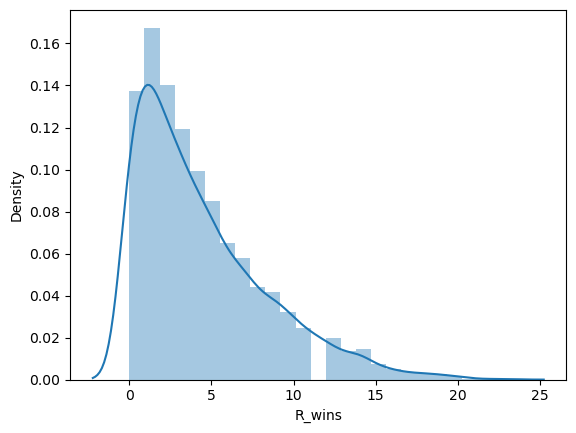

In [17]:
rw = sns.distplot(df['R_wins'], bins=25)

In [18]:
df['R_wins'].mean()

4.402850877192982

In [19]:
df['R_wins'].median()

3.0

In [20]:
df['R_wins'].max()

23

### Blue fighter wins

C:\Users\figue\AppData\Local\Temp\ipykernel_8\423767685.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  bw = sns.distplot(df['R_wins'], bins=25)
C:\Users\figue\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


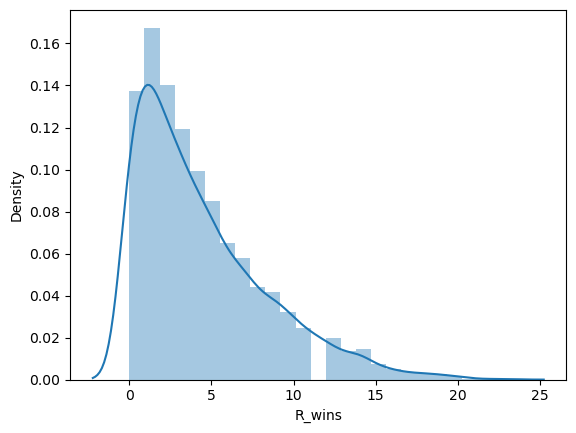

In [21]:
bw = sns.distplot(df['R_wins'], bins=25)

In [22]:
df['B_wins'].mean()

3.3875

In [23]:
df['B_wins'].median()

2.0

In [24]:
df['B_wins'].max()

23

# Prep for regression analysis

## Red wins and age range

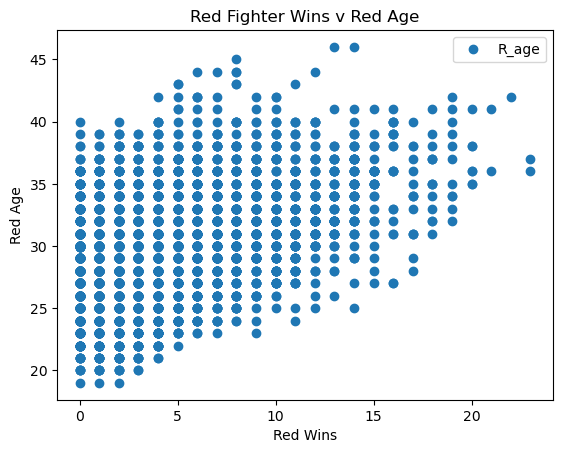

In [25]:
df.plot(x = 'R_wins', y='R_age',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Red Fighter Wins v Red Age')  
plt.xlabel('Red Wins')  
plt.ylabel('Red Age')  
plt.show()

In [26]:
X = df['R_wins'].values.reshape(-1,1)
y = df['R_age'].values.reshape(-1,1)

In [27]:
X

array([[1],
       [4],
       [5],
       ...,
       [1],
       [1],
       [0]], dtype=int64)

In [28]:
y

array([[27.        ],
       [28.        ],
       [43.        ],
       ...,
       [29.96106467],
       [30.        ],
       [27.        ]])

In [29]:
# Splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Regression analysis

In [30]:
regression = LinearRegression()

In [31]:
regression.fit(X_train, y_train)

LinearRegression()

In [32]:
y_predicted = regression.predict(X_test)

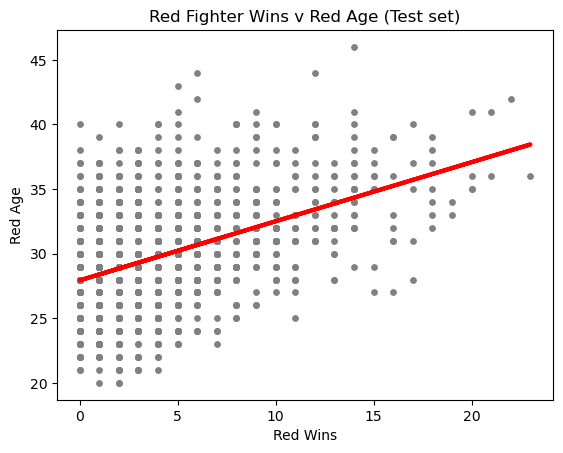

In [33]:
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Red Fighter Wins v Red Age (Test set)')
plot_test.xlabel('Red Wins')
plot_test.ylabel('Red Age')
plot_test.show()

In [34]:
rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [35]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.45743666]]
Mean squared error:  14.375963816967134
R2 score:  0.17889540457780417


In [36]:
y_predicted

array([[31.13624561],
       [28.39162565],
       [30.22137229],
       ...,
       [28.84906231],
       [32.96599225],
       [28.39162565]])

In [37]:
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,32.0,31.136246
1,28.0,28.391626
2,24.0,30.221372
3,30.0,28.391626
4,30.0,28.849062
5,21.0,27.934189
6,28.0,28.849062
7,34.0,31.593682
8,31.0,32.508556
9,27.0,27.934189


## Comparing regression and training set

In [38]:
y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [39]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [40]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.45743666]]
Mean squared error:  13.955485176590452
R2 score:  0.1902620769047787


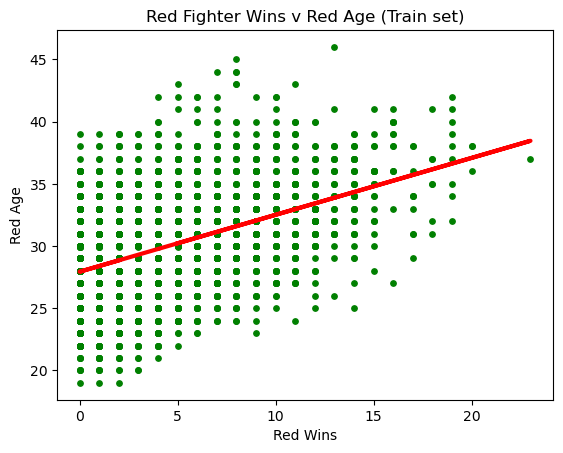

In [41]:
plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Red Fighter Wins v Red Age (Train set)')
plot_test.xlabel('Red Wins')
plot_test.ylabel('Red Age')
plot_test.show()

In [42]:
# Looking at this data shows that age may not have a strong variance with a .19. This suggests that this isnt a great data set to use with this model.
#It should be noted that there is 4000 data points, which gives this a fair amount of data to look at.
#Also the mean squared error is at 13, which is high, but not a huge amount.
# The slope does show that there is a positive relationship that the older the fighter is more likely they are to win.

In [43]:
df.to_csv(os.path.join(path, '02 Data','Prepared Data', 'UFC_MLRegression.csv'))